# Creating loyalty_flag

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

## Creating path for folder

In [3]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [9]:
# Importing subset with only high activity customers

In [5]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [15]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region', 'age_group',
       'loyalty_flag', 'mean_order_cost_per_user', 'spending_flag',
       'income_group', 'median_days_since_prior_order_per_user', 'freq_buyer'],
      dtype='object')

In [17]:
instacart.shape

(30963518, 32)

## 1. Creating loyalty flag

In [20]:
# loyalty will vary from 
# Loyal customer for max_order_per_user >40
# Regular customer for max_order_per_user <=40 and >10
# New customer for max_order_per_user <=10

In [22]:
# Creating new column with the result

loyalty_flag = [
    'Loyal customer' if value > 40 else
    'Regular customer' if 10 < value <= 40 else
    'New customer' 
    for value in instacart['max_order_per_user']
]

In [23]:
# adding new column to instacart dataframe

instacart['loyalty_flag'] = loyalty_flag

In [24]:
instacart['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876106
Loyal customer      10283957
New customer         4803455
Name: count, dtype: int64

## 2. Creating a bar chart of customer distribution by "loyalty"

In [28]:
# Creating a subset with unique entries for each user_id

bar_loyalty = instacart[['loyalty_flag', 'user_id']]

In [30]:
bar_loyalty.shape

(30963518, 2)

In [33]:
# Creating a subset withou duplicates

bar_loyalty_nodups = bar_loyalty.drop_duplicates()

In [34]:
bar_loyalty_nodups.shape

(162631, 2)

In [37]:
bar_loyalty_nodups['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    76864
New customer        68750
Loyal customer      17017
Name: count, dtype: int64

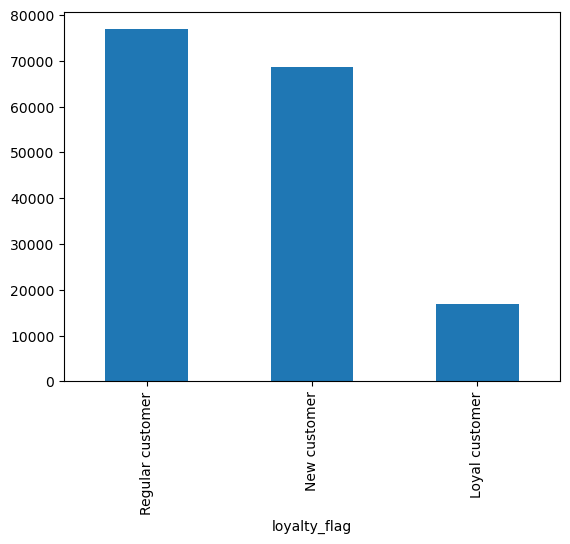

In [39]:
#Creating a bar chart

bar_loyalty = bar_loyalty_nodups['loyalty_flag'].value_counts().plot.bar()


In [41]:
# exporting plot

bar_loyalty.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'bar_loyalty.png'))

## 3. Creating basis stats for each "loyalty" category

In [23]:
# Creating a subset with unique entries for each user_id

order_cost_loyalty = instacart[['loyalty_flag', 'user_id','order_id', 'order_cost', 'products_per_order', 'Region', 'age_group', 'fam_status']]

In [25]:
order_cost_loyalty.shape

(30963518, 8)

In [27]:
order_cost_loyalty.head(10)

,loyalty_flag,user_id,order_id,order_cost
0,New customer,202279,2,91.6
1,New customer,202279,2,91.6
2,New customer,202279,2,91.6
3,New customer,202279,2,91.6
4,New customer,202279,2,91.6
5,New customer,202279,2,91.6
6,New customer,202279,2,91.6
7,New customer,202279,2,91.6
8,New customer,202279,2,91.6
9,Regular customer,205970,3,70.3


In [27]:
# Creating a subset withou duplicates

order_cost_loyalty = order_cost_loyalty.drop_duplicates()

In [29]:
order_cost_loyalty.shape

(3064375, 8)

In [30]:
order_cost_loyalty.head()

,loyalty_flag,user_id,order_id,order_cost
0,New customer,202279,2,91.6
9,Regular customer,205970,3,70.3
17,Loyal customer,178520,4,92.8
30,Loyal customer,156122,5,210.7
56,New customer,22352,6,27.5


In [31]:
order_cost_loyalty.groupby('loyalty_flag').agg({'order_cost':['mean']})

,order_cost
,mean
loyalty_flag,
Loyal customer,78.020082
New customer,76.978094
Regular customer,79.701540


In [32]:
#use this plot, since data is right skewed

order_cost_loyalty.groupby('loyalty_flag').agg({'order_cost':['median']})

,order_cost
,median
loyalty_flag,
Loyal customer,63.6
New customer,63.0
Regular customer,65.5


In [33]:
#---- HOW TO PRESENT THIS IS GRAPH?

In [48]:
order_cost_loyalty.groupby('loyalty_flag').agg({'products_per_order':['median', 'min', 'max']})

products_per_order         
                             median min  max
loyalty_flag                                
Loyal customer                 14.0   1  137
New customer                   14.0   1  102
Regular customer               14.0   1  145

### Median of order_cost is higher than mean, indicating that the data is right skewed

In [35]:
order_cost_loyalty.groupby('loyalty_flag').agg({'order_cost':['median', 'min', 'max']})

order_cost             
                     median  min     max
loyalty_flag                            
Loyal customer         63.6  0.0   875.0
New customer           63.0  0.0   829.2
Regular customer       65.5  0.0  1092.2

## 4. Creating a stacked bar chart showing spending flag by Region

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Text(0.5, 1.0, 'Customer Loyalty Status by Age')

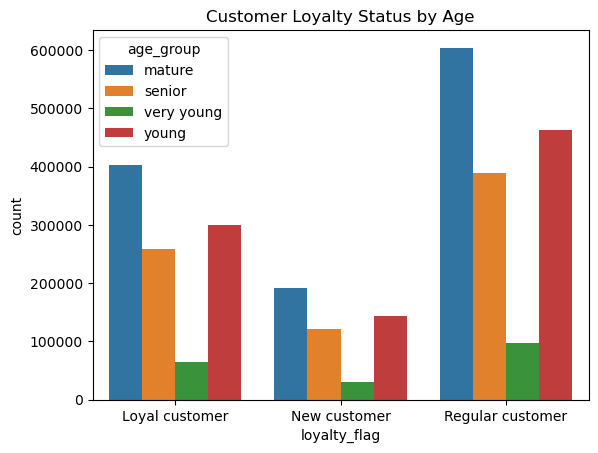

In [33]:
# Stacked bar chart

sns.barplot(x='loyalty_flag', y='count', hue='age_group', data=order_cost_loyalty.groupby(['age_group', 'loyalty_flag']).size().reset_index(name='count'))
plt.title("Customer Loyalty Status by Age")

Text(0.5, 1.0, 'Customer Loyalty Status by Age')

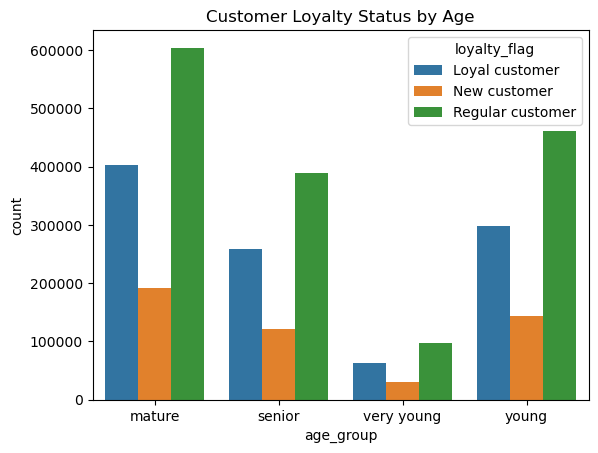

In [35]:
# Stacked bar chart

sns.barplot(x='age_group', y='count', hue='loyalty_flag', data=order_cost_loyalty.groupby(['age_group', 'loyalty_flag']).size().reset_index(name='count'))
plt.title("Customer Loyalty Status by Age")

Text(0.5, 1.0, 'Customer Loyalty Flag by Family Status ')

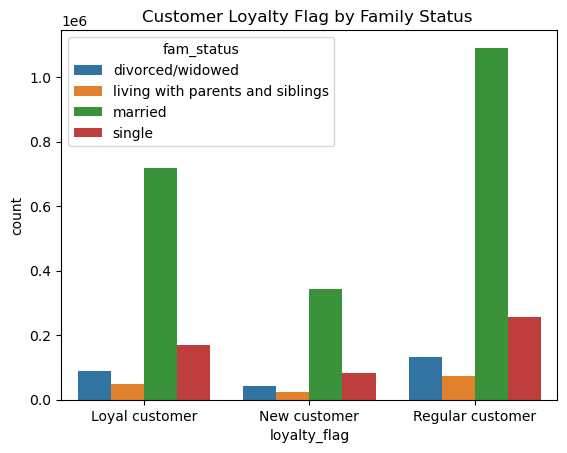

In [39]:
# Stacked bar chart

sns.barplot(x='loyalty_flag', y='count', hue='fam_status', data=order_cost_loyalty.groupby(['fam_status', 'loyalty_flag']).size().reset_index(name='count'))
plt.title("Customer Loyalty Flag by Family Status ")

## 5. Exporting 

In [ ]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))